In [1]:
! pip install split-folders

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix

In [4]:
import matplotlib.image as mpimg
%matplotlib inline

from tensorflow.keras.preprocessing import image_dataset_from_directory

# for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [5]:
! git clone https://github.com/VictorUmunna/AI-Hacktober-MLSA.git

Cloning into 'AI-Hacktober-MLSA'...
remote: Enumerating objects: 3680, done.
remote: Counting objects: 100% (722/722), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 3680 (delta 601), reused 519 (delta 519), pack-reused 2958
Receiving objects: 100% (3680/3680), 621.19 MiB | 48.31 MiB/s, done.
Resolving deltas: 100% (1347/1347), done.


Split the folders into train - 80%, test- 10% and validation sets-10%.

In [6]:
splitfolders.ratio("/content/AI-Hacktober-MLSA/Project_1/Data", output="/content/AI-Hacktober-MLSA/Project_1/Output_Data",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 574 files [00:00, 4506.10 files/s]


In [7]:
train_path = '/content/AI-Hacktober-MLSA/Project_1/Output_Data/train'
val_path = '/content/AI-Hacktober-MLSA/Project_1/Output_Data/val'
test_path = '/content/AI-Hacktober-MLSA/Project_1/Output_Data/test'

In [8]:
# GRADED FUNCTION: train_val_generators
def train_val_test_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):


  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale = 1./255.,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode = 'nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size = 45,
                                                      class_mode = 'categorical',
                                                      target_size = (150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory = VALIDATION_DIR,
                                                                batch_size = 5,
                                                                class_mode = 'categorical',
                                                                target_size = (150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  test_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  test_generator = test_datagen.flow_from_directory(directory = TEST_DIR,
                                                                batch_size = 5,
                                                                class_mode = 'categorical',
                                                                target_size = (150, 150))

  return train_generator, validation_generator, test_generator

In [9]:
train_generator, validation_generator, test_generator = train_val_test_generators(train_path, val_path, test_path)

Found 458 images belonging to 3 classes.
Found 55 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


In [10]:
from tensorflow.keras.optimizers import Adam
def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.22),
    tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, kernel_size=(4, 4), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis = 1),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [11]:
# create callbacks fr training
my_callbacks = tf.keras.callbacks.ModelCheckpoint('weights.h5', save_best_only = True,
                                                  save_weights_only = True)

# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=validation_generator,
                    callbacks=[my_callbacks])

Epoch 1/25
11/11 [==============================] - 27s 2s/step - loss: 1.7455 - accuracy: 0.4323 - val_loss: 1.5533 - val_accuracy: 0.5091
Epoch 2/25
11/11 [==============================] - 17s 2s/step - loss: 1.5774 - accuracy: 0.4498 - val_loss: 1.5507 - val_accuracy: 0.5273
Epoch 3/25
11/11 [==============================] - 16s 1s/step - loss: 1.4970 - accuracy: 0.5044 - val_loss: 1.5664 - val_accuracy: 0.5091
Epoch 4/25
11/11 [==============================] - 17s 2s/step - loss: 1.5104 - accuracy: 0.5175 - val_loss: 1.5026 - val_accuracy: 0.5091
Epoch 5/25
11/11 [==============================] - 17s 1s/step - loss: 1.4347 - accuracy: 0.5131 - val_loss: 1.5112 - val_accuracy: 0.5636
Epoch 6/25
11/11 [==============================] - 16s 1s/step - loss: 1.4338 - accuracy: 0.5197 - val_loss: 1.5218 - val_accuracy: 0.5455
Epoch 7/25
11/11 [==============================] - 16s 1s/step - loss: 1.4682 - accuracy: 0.5000 - val_loss: 1.4953 - val_accuracy: 0.5091
Epoch 8/25
11/11 [==

In [12]:
results = history.history

<ipython-input-13-a6c73883fee0>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


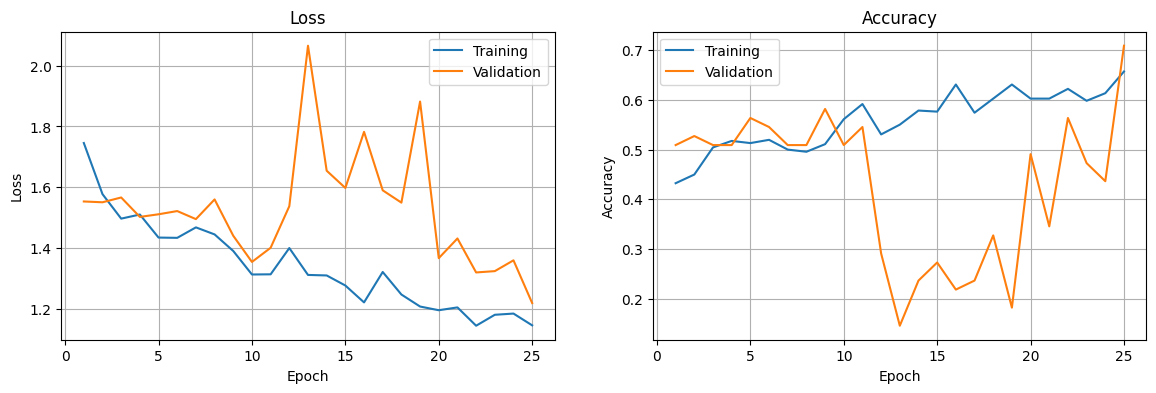

In [13]:
# plot results

n_epochs = len(results['loss'])

plt.figure(figsize=[14,4])
plt.grid(True)
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), results['loss'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), results['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving bungalow.jpg to bungalow (1).jpg
Saving bungalow2.jpg to bungalow2 (1).jpg
1/1 [==============================] - 0s 24ms/step
bungalow (1).jpg
[[0.000000e+00 1.000000e+00 2.994428e-13]]
1/1 [==============================] - 0s 27ms/step
bungalow2 (1).jpg
[[0.0000000e+00 1.6466144e-24 1.0000000e+00]]
